In [1]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries (These are ML algorithms)
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Installing XGBoost (Use pip in the command line or terminal, not in the script)
!pip install Xgboost
from xgboost import XGBClassifier

# Installing CatBoost (Use pip in the command line or terminal, not in the script)
!pip install CatBoost
from catboost import CatBoostClassifier


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the CSV file into a DataFrame
diabetes_prep_data = pd.read_csv(r'diabetes_data_num.csv')

In [3]:
diabetes_prep_data

,age,hypertension,heart_disease,smoking_history_category,bmi,HbA1c_level,blood_glucose_level,gender_category,diabetes
0,80.0,0,1,0,25.19,6.6,140,0,0
1,28.0,0,0,0,27.32,5.7,158,1,0
2,36.0,0,0,1,23.45,5.0,155,0,0
3,76.0,1,1,1,20.14,4.8,155,1,0
4,20.0,0,0,0,27.32,6.6,85,0,0
...,...,...,...,...,...,...,...,...,...
60107,26.0,0,0,0,34.34,6.5,160,0,0
60108,40.0,0,0,0,40.69,3.5,155,0,0
60109,66.0,0,0,3,27.83,5.7,155,1,0
60110,24.0,0,0,0,35.42,4.0,100,0,0


In [4]:
print(diabetes_prep_data.columns)  # Check what columns are available in the DataFrame


Index(['age', 'hypertension', 'heart_disease', 'smoking_history_category',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_category',
       'diabetes'],
      dtype='object')


#### Extracting only numerical variables and storing 'diabtes' as a label

## Dealing with outlier

#### The result of exploratory data analysis revealed the presence of outliers in the 'bmi', 'hypertension', 'heart_disease',  'HbA1c_level', and 'blood_glucose_level' columns which calls for normalization

## Normalizing the dataset

In [9]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the specified columns
diabetes_prep_data["Scaled_bmi"] = scaler.fit_transform(diabetes_prep_data[['bmi']].values.reshape(-1, 1))
diabetes_prep_data["scaled_hyper"] = scaler.fit_transform(diabetes_prep_data[['hypertension']].values.reshape(-1, 1))
diabetes_prep_data["scaled_heart_disease"] = scaler.fit_transform(diabetes_prep_data[['heart_disease']].values.reshape(-1, 1))
diabetes_prep_data["scaled_HbA1c_level"] = scaler.fit_transform(diabetes_prep_data[['HbA1c_level']].values.reshape(-1, 1))
# Drop the original columns that have been scaled
diabetes_prep_data.drop(['bmi', 'hypertension', 'heart_disease', 'HbA1c_level'], axis=1, inplace=True)

# Display the updated DataFrame
diabetes_prep_data

,age,smoking_history_category,blood_glucose_level,gender_category,diabetes,Scaled_bmi,scaled_hyper,scaled_heart_disease,scaled_HbA1c_level
0,80.0,0,140,0,0,0.184854,0.0,1.0,0.563636
1,28.0,0,158,1,0,0.210913,0.0,0.0,0.400000
2,36.0,1,155,0,0,0.163567,0.0,0.0,0.272727
3,76.0,1,155,1,0,0.123073,1.0,1.0,0.236364
4,20.0,0,85,0,0,0.210913,0.0,0.0,0.563636
...,...,...,...,...,...,...,...,...,...
60107,26.0,0,160,0,0,0.296795,0.0,0.0,0.545455
60108,40.0,0,155,0,0,0.374480,0.0,0.0,0.000000
60109,66.0,3,155,1,0,0.217152,0.0,0.0,0.400000
60110,24.0,0,100,0,0,0.310007,0.0,0.0,0.090909


In [10]:
diabetes_prep_data

,age,smoking_history_category,blood_glucose_level,gender_category,diabetes,Scaled_bmi,scaled_hyper,scaled_heart_disease,scaled_HbA1c_level
0,80.0,0,140,0,0,0.184854,0.0,1.0,0.563636
1,28.0,0,158,1,0,0.210913,0.0,0.0,0.400000
2,36.0,1,155,0,0,0.163567,0.0,0.0,0.272727
3,76.0,1,155,1,0,0.123073,1.0,1.0,0.236364
4,20.0,0,85,0,0,0.210913,0.0,0.0,0.563636
...,...,...,...,...,...,...,...,...,...
60107,26.0,0,160,0,0,0.296795,0.0,0.0,0.545455
60108,40.0,0,155,0,0,0.374480,0.0,0.0,0.000000
60109,66.0,3,155,1,0,0.217152,0.0,0.0,0.400000
60110,24.0,0,100,0,0,0.310007,0.0,0.0,0.090909


In [11]:
# Get the list of current columns
cols = list(diabetes_prep_data.columns)

# Move the 'diabetes' column to the right end
cols.append(cols.pop(cols.index('diabetes')))

# Reorder the DataFrame using the new column order
diabetes_prep_data = diabetes_prep_data[cols]

# Display the updated DataFrame
diabetes_prep_data.head()


,age,smoking_history_category,blood_glucose_level,gender_category,Scaled_bmi,scaled_hyper,scaled_heart_disease,scaled_HbA1c_level,diabetes
0,80.0,0,140,0,0.184854,0.0,1.0,0.563636,0
1,28.0,0,158,1,0.210913,0.0,0.0,0.400000,0
2,36.0,1,155,0,0.163567,0.0,0.0,0.272727,0
3,76.0,1,155,1,0.123073,1.0,1.0,0.236364,0
4,20.0,0,85,0,0.210913,0.0,0.0,0.563636,0


In [12]:
diabetes_data_modified = diabetes_prep_data[['age', 'smoking_history_category', 'blood_glucose_level', 'gender_category', 'Scaled_bmi', 'scaled_hyper', 'scaled_heart_disease', 'scaled_HbA1c_level' ]]
label = diabetes_prep_data[['diabetes']]


In [13]:
label

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
60107,0
60108,0
60109,0
60110,0


In [14]:
diabetes_data_modified

,age,smoking_history_category,blood_glucose_level,gender_category,Scaled_bmi,scaled_hyper,scaled_heart_disease,scaled_HbA1c_level
0,80.0,0,140,0,0.184854,0.0,1.0,0.563636
1,28.0,0,158,1,0.210913,0.0,0.0,0.400000
2,36.0,1,155,0,0.163567,0.0,0.0,0.272727
3,76.0,1,155,1,0.123073,1.0,1.0,0.236364
4,20.0,0,85,0,0.210913,0.0,0.0,0.563636
...,...,...,...,...,...,...,...,...
60107,26.0,0,160,0,0.296795,0.0,0.0,0.545455
60108,40.0,0,155,0,0.374480,0.0,0.0,0.000000
60109,66.0,3,155,1,0.217152,0.0,0.0,0.400000
60110,24.0,0,100,0,0.310007,0.0,0.0,0.090909


In [15]:
diabetes_data_modified.to_csv('diabetes_data_modified.csv', index=False)

In [16]:
# 9 machine learning algorithms will be applied to the dataset
# Define the list of classifiers with their names
classifiers = [
    [XGBClassifier(), 'XGBClassifier'],
    [RandomForestClassifier(), 'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression'],
    [CatBoostClassifier(verbose=0), 'CatBoost']  # Added CatBoostClassifier
]

# Print the classifiers list to verify
print(classifiers)


[[XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'XGBClassifier'], [RandomForestClassifier(), 'Random Forest'], [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(), 'SGD Classifier'], [SVC(), 'SVC'], [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(random_state=42), 

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd


# Define features (X) and target (y)
X = diabetes_data_modified
y = diabetes_prep_data['diabetes'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now define the classifiers and evaluate them as before
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define the list of classifiers with their names
classifiers = [
    [XGBClassifier(), 'XGBClassifier'],
    [RandomForestClassifier(), 'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
    [LogisticRegression(), 'Logistic Regression'],
    [CatBoostClassifier(verbose=0), 'CatBoost']
]

# Initialize dictionaries to store results
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

# Iterate over classifiers to train and evaluate
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    pred = model.predict(x_test)
    
    # Calculate metrics
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    # Store results
    acc_list[model_name] = f"{round(a_score * 100, 2)}%"
    precision_list[model_name] = f"{round(p_score * 100, 2)}%"
    recall_list[model_name] = f"{round(r_score * 100, 2)}%"
    roc_list[model_name] = f"{round(roc_score * 100, 2)}%"

# Print results
print("Accuracy Scores:", acc_list)
print("Precision Scores:", precision_list)
print("Recall Scores:", recall_list)
print("ROC AUC Scores:", roc_list)


Accuracy Scores: {'XGBClassifier': '96.05%', 'Random Forest': '96.07%', 'K-Nearest Neighbours': '92.96%', 'SGD Classifier': '87.8%', 'SVC': '92.06%', 'Naive Bayes': '90.11%', 'Decision Tree': '93.5%', 'Logistic Regression': '94.5%', 'CatBoost': '96.25%'}
Precision Scores: {'XGBClassifier': '93.65%', 'Random Forest': '94.7%', 'K-Nearest Neighbours': '86.69%', 'SGD Classifier': '47.55%', 'SVC': '100.0%', 'Naive Bayes': '55.97%', 'Decision Tree': '70.69%', 'Logistic Regression': '87.05%', 'CatBoost': '96.23%'}
Recall Scores: {'XGBClassifier': '70.41%', 'Random Forest': '69.75%', 'K-Nearest Neighbours': '45.73%', 'SGD Classifier': '59.62%', 'SVC': '30.9%', 'Naive Bayes': '65.48%', 'Decision Tree': '74.17%', 'Logistic Regression': '61.29%', 'CatBoost': '70.12%'}
ROC AUC Scores: {'XGBClassifier': '84.89%', 'Random Forest': '84.62%', 'K-Nearest Neighbours': '72.41%', 'SGD Classifier': '75.54%', 'SVC': '65.45%', 'Naive Bayes': '79.4%', 'Decision Tree': '85.09%', 'Logistic Regression': '80.05%'

In [18]:
print(set(diabetes_prep_data['diabetes']))

{0, 1}


In [19]:
print("Unique values in y_train:", set(y_train))
print("Unique values in y_test:", set(y_test))


Unique values in y_train: {0, 1}
Unique values in y_test: {0, 1}


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the result dictionaries to pandas DataFrames for easier plotting
acc_df = pd.DataFrame(list(acc_list.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_list.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_list.items()), columns=['Model', 'Recall'])
roc_df = pd.DataFrame(list(roc_list.items()), columns=['Model', 'ROC AUC'])

# Convert percentages back to floats for plotting
acc_df['Accuracy'] = acc_df['Accuracy'].str.rstrip('%').astype('float')
precision_df['Precision'] = precision_df['Precision'].str.rstrip('%').astype('float')
recall_df['Recall'] = recall_df['Recall'].str.rstrip('%').astype('float')
roc_df['ROC AUC'] = roc_df['ROC AUC'].str.rstrip('%').astype('float')


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the result dictionaries to pandas DataFrames for easier plotting
acc_df = pd.DataFrame(list(acc_list.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_list.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_list.items()), columns=['Model', 'Recall'])
roc_df = pd.DataFrame(list(roc_list.items()), columns=['Model', 'ROC AUC'])

# Convert percentages back to floats for plotting
acc_df['Accuracy'] = acc_df['Accuracy'].str.rstrip('%').astype('float')
precision_df['Precision'] = precision_df['Precision'].str.rstrip('%').astype('float')
recall_df['Recall'] = recall_df['Recall'].str.rstrip('%').astype('float')
roc_df['ROC AUC'] = roc_df['ROC AUC'].str.rstrip('%').astype('float')

# Set the plot style
sns.set(style="whitegrid")

# Function to add labels on top of bars
def add_labels(chart, ax):
    for p in chart.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')



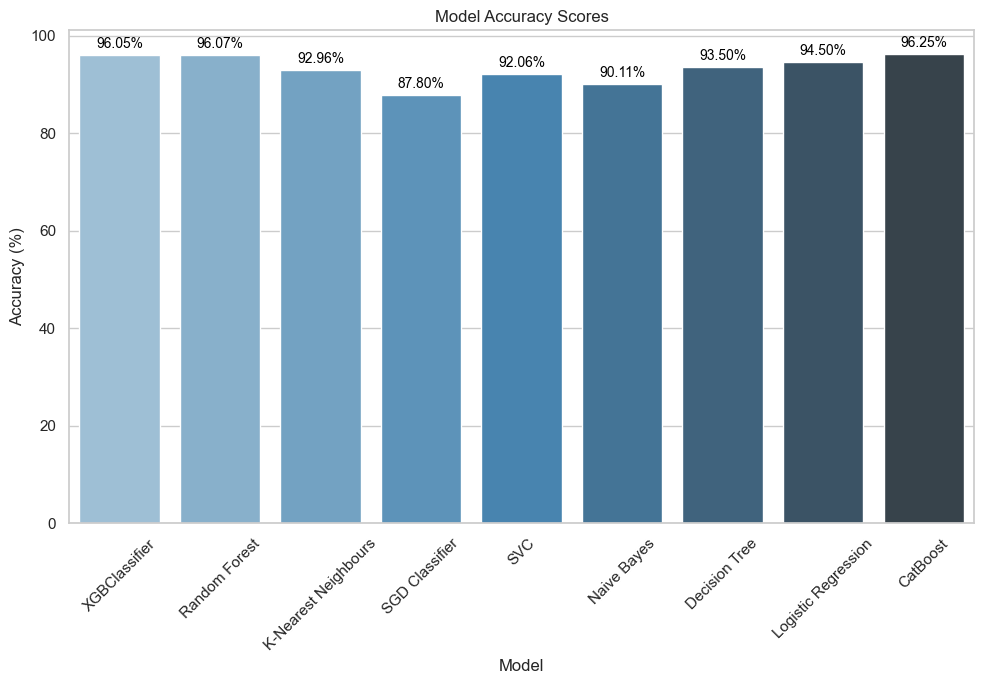

In [22]:
# Plot the accuracy scores (vertical orientation)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='Blues_d')
plt.title('Model Accuracy Scores')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
add_labels(ax, ax)
plt.tight_layout()  # Adjust layout to avoid cut-off labels
plt.show()

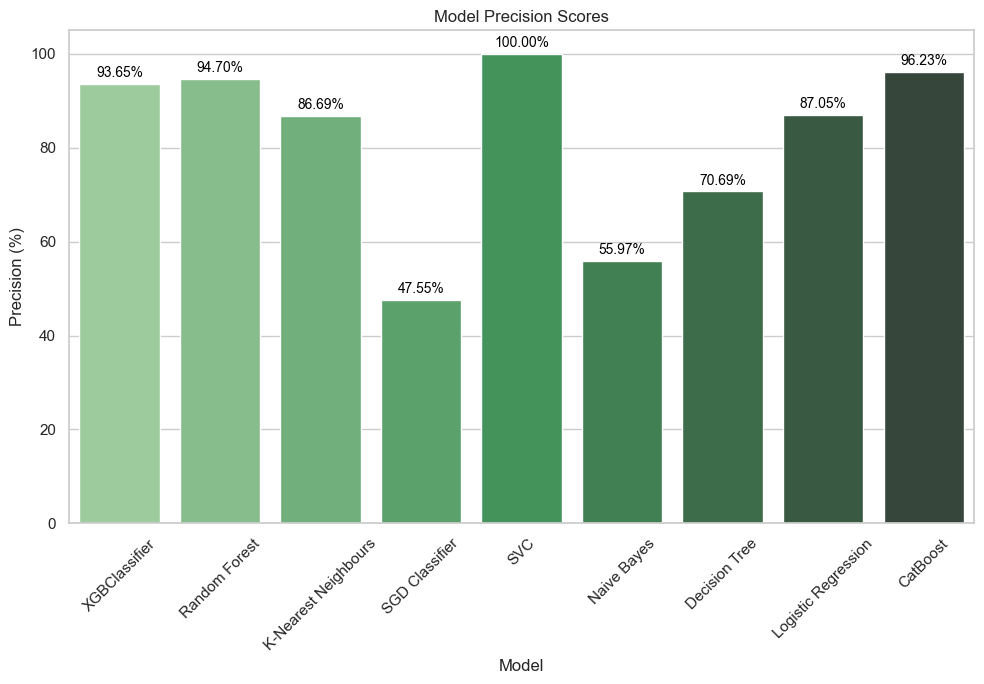

In [23]:
# Plot the precision scores (vertical orientation)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Model', y='Precision', data=precision_df, palette='Greens_d')
plt.title('Model Precision Scores')
plt.ylabel('Precision (%)')
plt.xticks(rotation=45)
add_labels(ax, ax)
plt.tight_layout()
plt.show()


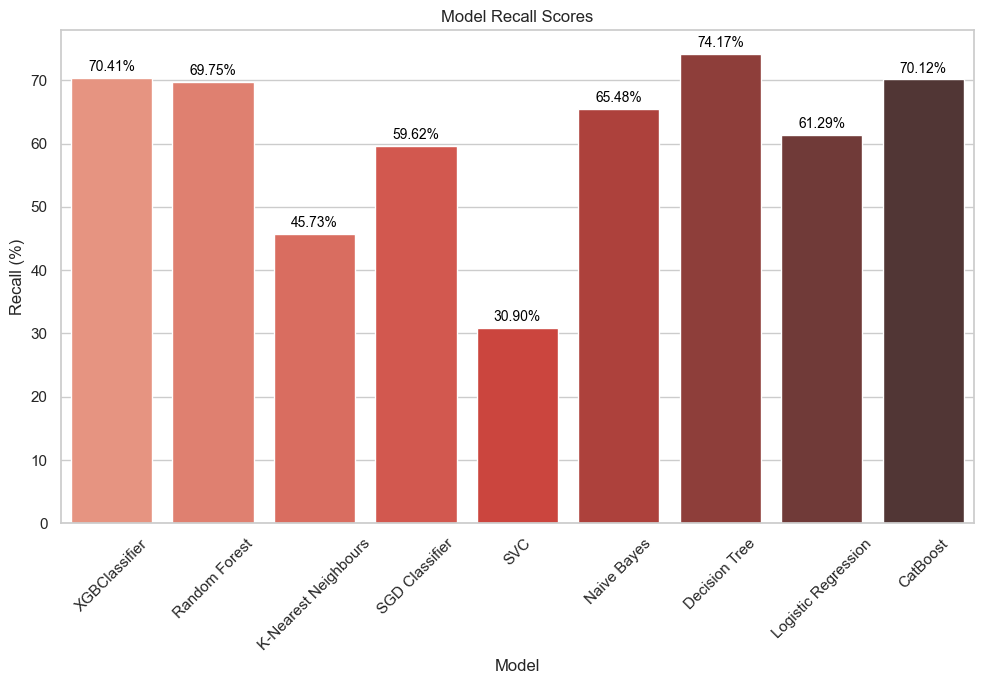

In [24]:
# Plot the recall scores (vertical orientation)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Model', y='Recall', data=recall_df, palette='Reds_d')
plt.title('Model Recall Scores')
plt.ylabel('Recall (%)')
plt.xticks(rotation=45)
add_labels(ax, ax)
plt.tight_layout()
plt.show()

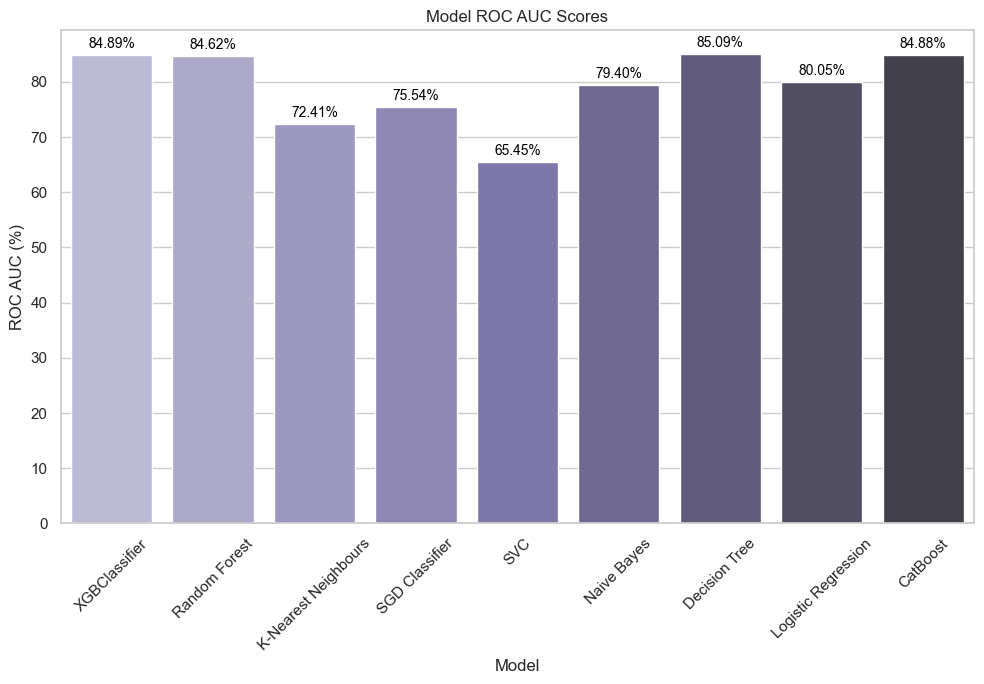

In [25]:
# Plot the ROC AUC scores (vertical orientation)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Model', y='ROC AUC', data=roc_df, palette='Purples_d')
plt.title('Model ROC AUC Scores')
plt.ylabel('ROC AUC (%)')
plt.xticks(rotation=45)
add_labels(ax, ax)
plt.tight_layout()
plt.show()


In [26]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (48089, 8)
y_train shape: (48089,)
x_test shape: (12023, 8)
y_test shape: (12023,)


# Logistic Regression Model 

In [28]:
# Logistic Regression 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred, average='weighted'))
print("Recall:", recall_score(y_test, ly_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, ly_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1]))

Logistic Regression
Accuracy: 0.9450220410879149
Precision: 0.9422638470985993
Recall: 0.9450220410879149
F1 Score: 0.940766271798223
AUC-ROC: 0.9463611857638811


# Logistic Confusion Matrix Model

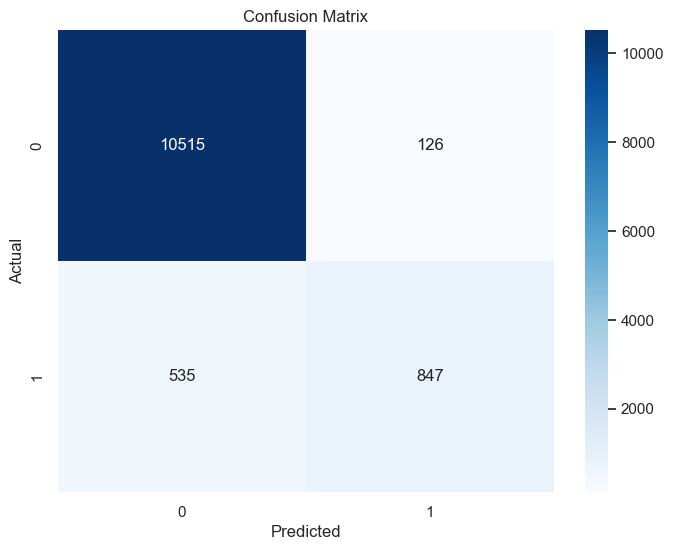

In [30]:
# Create the confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# Random Forest Model

In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("f1_score:", f1_score(y_test, rfy_pred))
print("AUC_ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.9612409548365632
Precision: 0.9516765285996055
Recall: 0.6982633863965267
f1_score: 0.8055091819699499
AUC_ROC: 0.8468292780117207


# Random Forest Confusion Matrix

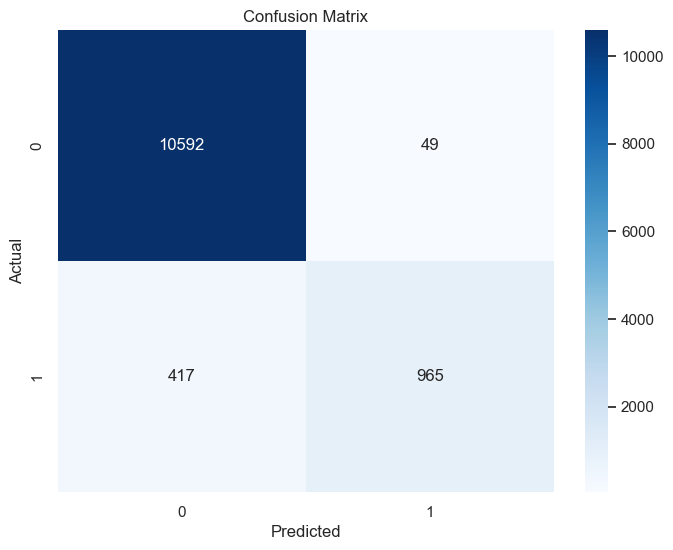

In [34]:
# Create the confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


# Tunning Random Forest Hyperparamter

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the model
rfc = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_rfc = grid_search.best_estimator_

# Make predictions with the best model
rfy_pred = best_rfc.predict(x_test)

# Print evaluation metrics
print("Random Forest with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred, average='weighted'))
print("Recall:", recall_score(y_test, rfy_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, rfy_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest with Hyperparameter Tuning
Accuracy: 0.9629044331697579
Precision: 0.9642989847358548
Recall: 0.9629044331697579
F1 Score: 0.9597511804716201
AUC-ROC: 0.8392692655486635


In [37]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(48089, 8) (48089,)
(12023, 8) (12023,)


# Visualizing Tuned Random Forest Confusion Matrix

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest with Hyperparameter Tuning
Accuracy: 0.9628212592530982
Precision: 0.9641262524921062
Recall: 0.9628212592530982
F1 Score: 0.9596869733944964
AUC-ROC: 0.9686152365634875


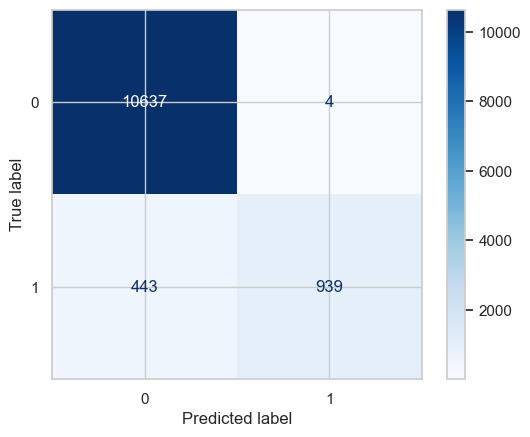

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Define the model
rfc = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_rfc = grid_search.best_estimator_

# Make predictions with the best model
rfy_pred = best_rfc.predict(x_test)

# Print evaluation metrics
print("Random Forest with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred, average='weighted'))
print("Recall:", recall_score(y_test, rfy_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, rfy_pred, average='weighted'))

# For binary classification, no need for label_binarize
rfy_pred_proba = best_rfc.predict_proba(x_test)[:, 1]  # Take probability for the positive class
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred_proba))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, rfy_pred)

# Plot and display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_rfc.classes_)
disp.plot(cmap='Blues')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest with Hyperparameter Tuning
Accuracy: 0.9629876070864177
Precision: 0.9643759092458655
Recall: 0.9629876070864177
F1 Score: 0.9598500728346875
AUC-ROC: 0.9668759301562874
   Prediction  Predicted Probability (%)
0           0                      98.94
1           0                      99.04
2           0                      99.02
3           0                      94.38
4           0                      95.85


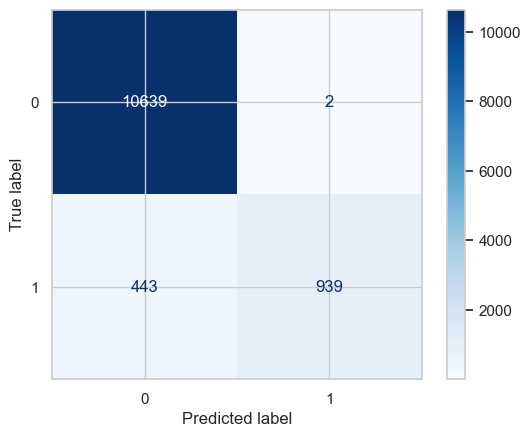

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Define the model
rfc = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_rfc = grid_search.best_estimator_

# Make predictions with the best model
rfy_pred = best_rfc.predict(x_test)
rfy_pred_proba = best_rfc.predict_proba(x_test)  # Get the probability for each class

# Extract the probabilities corresponding to the predicted class
predicted_class_prob = [rfy_pred_proba[i, pred] for i, pred in enumerate(rfy_pred)]

# Convert probabilities to percentages
predicted_class_prob_percent = (pd.Series(predicted_class_prob) * 100).round(2)

# Print evaluation metrics
print("Random Forest with Hyperparameter Tuning")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred, average='weighted'))
print("Recall:", recall_score(y_test, rfy_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, rfy_pred, average='weighted'))

# AUC-ROC calculation
rfy_pred_proba_positive = rfy_pred_proba[:, 1]  # Assuming binary classification, take the probability for the positive class
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred_proba_positive))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, rfy_pred)

# Plot and display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_rfc.classes_)
disp.plot(cmap='Blues')

# Create a DataFrame to display predictions and their corresponding probabilities
predictions_df = pd.DataFrame({
    'Prediction': rfy_pred,
    'Predicted Probability (%)': predicted_class_prob_percent
})

# Display the DataFrame with one column for predicted probabilities
print(predictions_df.head())


# CatBoost Model

In [42]:
# Instantiate the CatBoost classifier
catboost_model = CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress output during training

# Fit the model
catboost_model.fit(x_train, y_train)

# Make predictions
catboost_pred = catboost_model.predict(x_test)

# Print evaluation metrics
print("CatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, catboost_pred))
print("Precision:", precision_score(y_test, catboost_pred, average='weighted'))
print("Recall:", recall_score(y_test, catboost_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, catboost_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, catboost_model.predict_proba(x_test)[:, 1]))


CatBoost Classifier
Accuracy: 0.9624885635864593
Precision: 0.9624809242671829
Recall: 0.9624885635864593
F1 Score: 0.95986925203523
AUC-ROC: 0.9739856119960869


In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(48089, 8) (48089,)
(12023, 8) (12023,)


# CatBoost Confusion Matrix

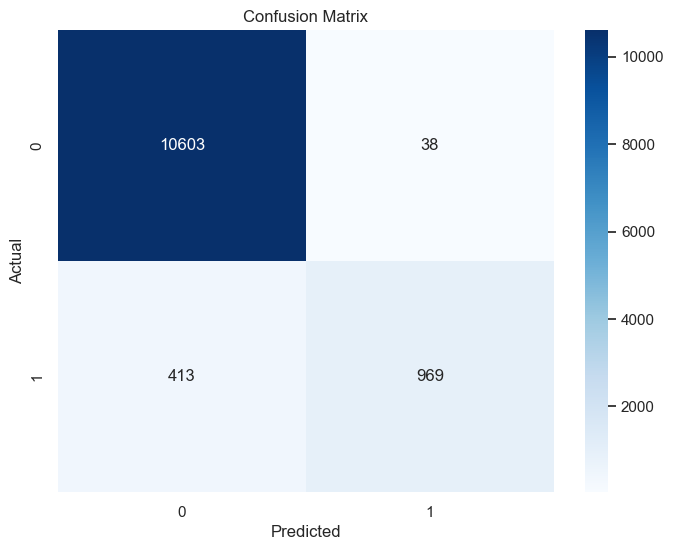

In [45]:
# Create the confusion matrix for CatBoost classifier
catboost_rcm = confusion_matrix(y_test, catboost_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(catboost_rcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [54]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a smaller parameter grid
param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3],
    'loss_function': ['Logloss']
}

# Instantiate the CatBoost classifier with early stopping
catboost_model = CatBoostClassifier(verbose=2, early_stopping_rounds=20)

# Set up GridSearchCV with fewer folds and random parameter search
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=2, scoring='roc_auc', n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model from grid search
best_catboost_model = grid_search.best_estimator_

# Make predictions
catboost_pred = best_catboost_model.predict(x_test)

# Print evaluation metrics
print("CatBoost Classifier")
print("Accuracy:", accuracy_score(y_test, catboost_pred))
print("Precision:", precision_score(y_test, catboost_pred, average='weighted'))
print("Recall:", recall_score(y_test, catboost_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, catboost_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, best_catboost_model.predict_proba(x_test)[:, 1]))


0:	learn: 0.6121263	total: 5.06ms	remaining: 501ms
2:	learn: 0.4905611	total: 14.4ms	remaining: 465ms
4:	learn: 0.4031586	total: 25.5ms	remaining: 485ms
6:	learn: 0.3400421	total: 36.1ms	remaining: 480ms
8:	learn: 0.2924052	total: 45.8ms	remaining: 464ms
10:	learn: 0.2562752	total: 54.9ms	remaining: 444ms
12:	learn: 0.2281531	total: 64.9ms	remaining: 435ms
14:	learn: 0.2060820	total: 74.6ms	remaining: 423ms
16:	learn: 0.1886286	total: 83.6ms	remaining: 408ms
18:	learn: 0.1752068	total: 91.8ms	remaining: 391ms
20:	learn: 0.1628547	total: 101ms	remaining: 380ms
22:	learn: 0.1525675	total: 112ms	remaining: 376ms
24:	learn: 0.1445326	total: 124ms	remaining: 371ms
26:	learn: 0.1387258	total: 134ms	remaining: 363ms
28:	learn: 0.1331333	total: 145ms	remaining: 355ms
30:	learn: 0.1292801	total: 156ms	remaining: 347ms
32:	learn: 0.1255402	total: 167ms	remaining: 340ms
34:	learn: 0.1223635	total: 179ms	remaining: 332ms
36:	learn: 0.1200857	total: 189ms	remaining: 321ms
38:	learn: 0.1176800	total

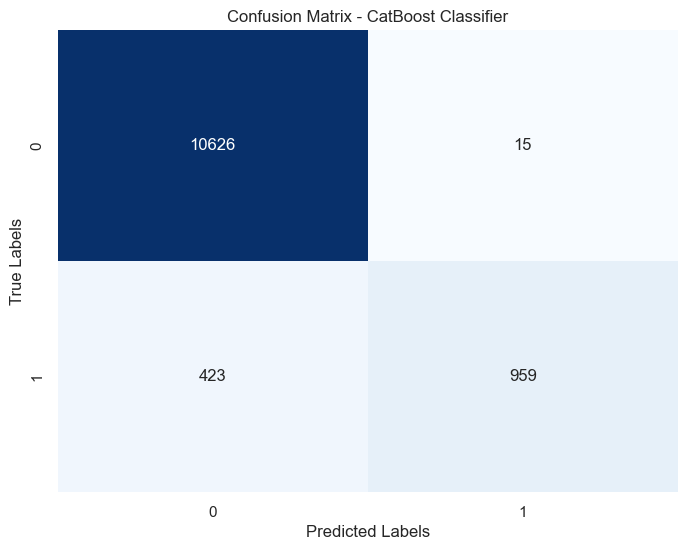

In [114]:
# Create the confusion matrix
catboost_cm = confusion_matrix(y_test, catboost_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(catboost_cm, annot=True, cmap="Blues", fmt="g", cbar=False)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - CatBoost Classifier")

# Show the plot
plt.show()

In [53]:
print("Unique values in y_train:", set(y_train))
print("Unique values in y_test:", set(y_test))


Unique values in y_train: {0, 1}
Unique values in y_test: {0, 1}


# SVM Model

In [58]:
# Instantiate the SVM classifier
svm_model = SVC(probability=True)  # Set probability=True to enable probability estimates

# Fit the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_pred = svm_model.predict(x_test)

# Predict probabilities for AUC-ROC calculation
svm_pred_proba = svm_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, svm_pred_proba))


SVM Classifier
Accuracy: 0.9205689095899526
Precision: 0.9271105352661854
Recall: 0.9205689095899526
F1 Score: 0.9013080800972108
AUC-ROC: 0.8786277200207644


# SVM Confusion Matrix

x_train shape: (48089, 8)
y_train shape: (48089,)
x_test shape: (12023, 8)
y_test shape: (12023,)
SVM Classifier
Accuracy: 0.9205689095899526
Precision: 0.9271105352661854
Recall: 0.9205689095899526
F1 Score: 0.9013080800972108
AUC-ROC: 0.8786277200207644


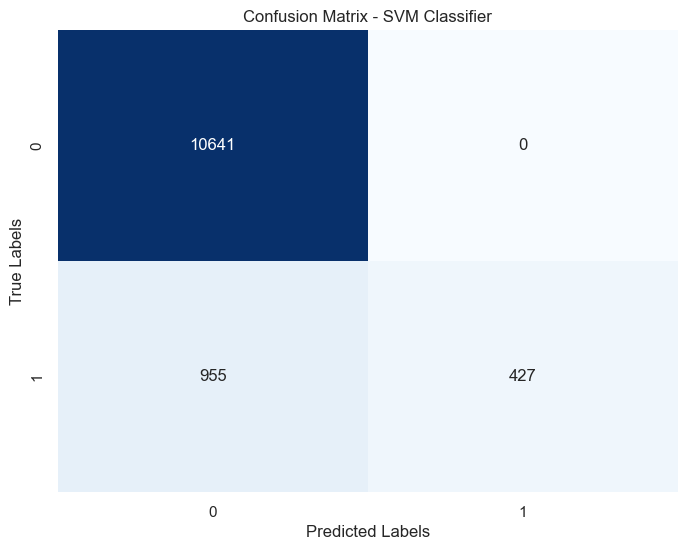

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Define x (features) and y (target)
x = diabetes_data_modified
y = diabetes_prep_data['diabetes']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check shapes to ensure consistency
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Instantiate the SVM classifier
svm_model = SVC(probability=True)

# Fit the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_pred = svm_model.predict(x_test)

# Predict probabilities for AUC-ROC calculation
svm_pred_proba = svm_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='weighted'))
print("Recall:", recall_score(y_test, svm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, svm_pred_proba))

# Create the confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="g", cbar=False)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")

# Show the plot
plt.show()


# KNeighbors Model

In [59]:
# Instantiate the KNN classifier
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(x_train, y_train)

# Make predictions
knn_pred = knn_model.predict(x_test)

# Print evaluation metrics
print("K-Nearest Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, knn_model.predict_proba(x_test)[:, 1]))


K-Nearest Neighbors Classifier
Accuracy: 0.929551692589204
Precision: 0.9259316489901667
Recall: 0.929551692589204
F1 Score: 0.919704347312567
AUC-ROC: 0.8551098194719902


# Confusion Matrix for KNeighbors

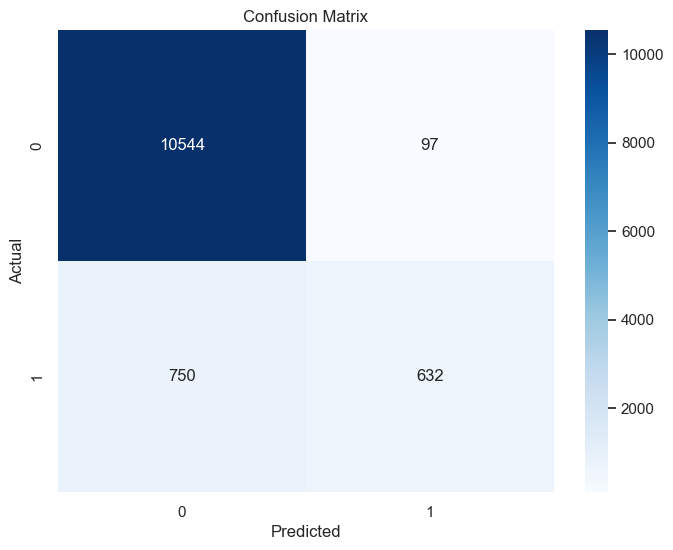

In [60]:
# Create the confusion matrix for K-Nearest Neighbors classifier
knn_rcm = confusion_matrix(y_test, knn_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_rcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


# SGD Model

In [61]:

# Instantiate the SGD classifier with log_loss
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

# Fit the model
sgd_model.fit(x_train, y_train)

# Make predictions
sgd_pred = sgd_model.predict(x_test)

# For ROC-AUC: Use decision_function instead of predict_proba
sgd_pred_proba = sgd_model.decision_function(x_test)

# If y_test is multiclass, binarize it for AUC-ROC calculation
if len(np.unique(y_test)) > 2:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    auc_roc = roc_auc_score(y_test_bin, sgd_pred_proba, average='weighted', multi_class='ovr')
else:
    auc_roc = roc_auc_score(y_test, sgd_pred_proba)

# Print evaluation metrics
print("SGD Classifier")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("Precision:", precision_score(y_test, sgd_pred, average='weighted'))
print("Recall:", recall_score(y_test, sgd_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, sgd_pred, average='weighted'))
print("AUC-ROC:", auc_roc)



SGD Classifier
Accuracy: 0.8927888214256009
Precision: 0.8946614490186794
Recall: 0.8927888214256009
F1 Score: 0.8936957971726024
AUC-ROC: 0.8860576823038322


# Confusion Matrix for SGD Classifier

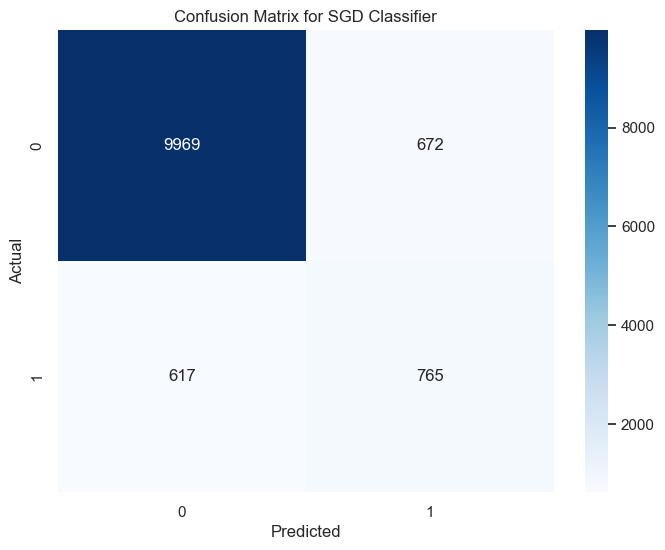

In [62]:
# Create the confusion matrix for SGD classifier
sgd_rcm = confusion_matrix(y_test, sgd_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sgd_rcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SGD Classifier")

# Show the plot
plt.show()


# Gaussian Naive Bayes Model

In [63]:
# Instantiate the Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Fit the model
gnb_model.fit(x_train, y_train)

# Make predictions
gnb_pred = gnb_model.predict(x_test)

# Predict probabilities for AUC-ROC calculation
gnb_pred_proba = gnb_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print("Gaussian Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, gnb_pred))
print("Precision:", precision_score(y_test, gnb_pred, average='weighted'))
print("Recall:", recall_score(y_test, gnb_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, gnb_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, gnb_pred_proba))


Gaussian Naive Bayes Classifier
Accuracy: 0.9011062130915745
Precision: 0.9088167197342346
Recall: 0.9011062130915745
F1 Score: 0.9044287459880975
AUC-ROC: 0.9132488799364499


# Confusion Matrix for GaussianNBC

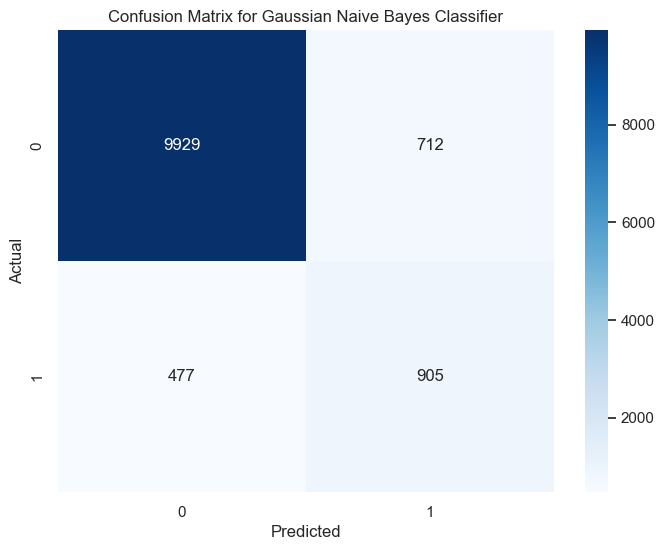

In [64]:
# Create the confusion matrix for Gaussian Naive Bayes classifier
gnb_rcm = confusion_matrix(y_test, gnb_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_rcm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gaussian Naive Bayes Classifier")

# Show the plot
plt.show()


# Decision Tree Model

In [65]:
# Instantiate the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(x_train, y_train)

# Make predictions
dt_pred = dt_model.predict(x_test)

# Predict probabilities for AUC-ROC calculation
dt_pred_proba = dt_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, average='weighted'))
print("Recall:", recall_score(y_test, dt_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, dt_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, dt_pred_proba))


Decision Tree Classifier
Accuracy: 0.9349579971720868
Precision: 0.936424768976727
Recall: 0.9349579971720868
F1 Score: 0.9356346248691686
AUC-ROC: 0.8511075719328797


# Confusion Matrix for Decision Tree Model

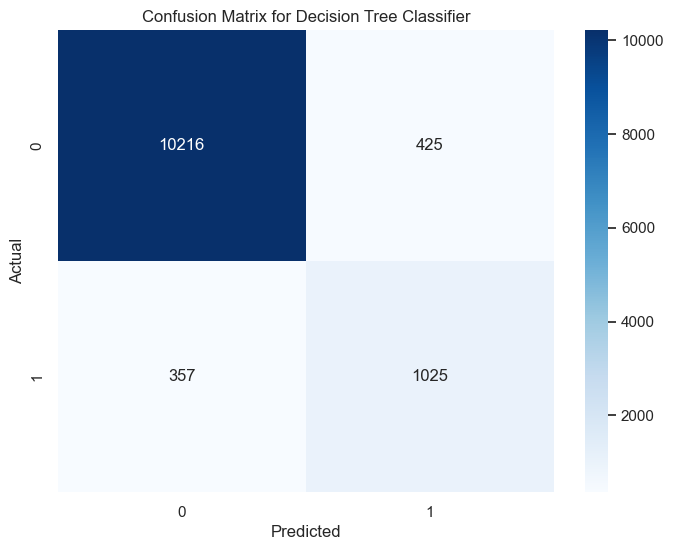

In [66]:
# Create the confusion matrix for Decision Tree classifier
dt = confusion_matrix(y_test, dt_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dt, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Classifier")

# Show the plot
plt.show()


# Neural Network Model

In [67]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_proba = model.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # Convert probabilities to class labels

# Print evaluation metrics
print("Neural Network Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Epoch 1/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8349 - loss: 1.4789 - val_accuracy: 0.8788 - val_loss: 0.4069
Epoch 2/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8882 - loss: 0.3321 - val_accuracy: 0.9081 - val_loss: 0.2578
Epoch 3/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9036 - loss: 0.2589 - val_accuracy: 0.9268 - val_loss: 0.2319
Epoch 4/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - accuracy: 0.9177 - loss: 0.2221 - val_accuracy: 0.9207 - val_loss: 0.1927
Epoch 5/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.9251 - loss: 0.2000 - val_accuracy: 0.9187 - val_loss: 0.2132
Epoch 6/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.9290 - loss: 0.1922 - val_accuracy: 0.9364 - val_loss: 0.1686
Epoch 7/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.9364 - loss: 0.1706 - val_accuracy: 0.9424 - val_loss: 0.1600
Epoch 8/10
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.9336 - l

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.0


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3672 - loss: 1.1479 - val_accuracy: 0.3333 - val_loss: 1.1831
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5247 - loss: 1.0646 - val_accuracy: 0.4583 - val_loss: 1.0957
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6849 - loss: 1.0041 - val_accuracy: 0.5417 - val_loss: 1.0144
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7383 - loss: 0.9405 - val_accuracy: 0.6667 - val_loss: 0.9384
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7852 - loss: 0.8790 - val_accuracy: 0.8333 - val_loss: 0.8650
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8424 - loss: 0.8193 - val_accuracy: 0.9167 - val_loss: 0.7998
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8333 - loss: 0.7752 - val_accuracy: 0.8750 - val_loss: 0.7418
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7865 - loss: 0.7342 - val_accuracy: 0.8750 - val_loss: 0.6894


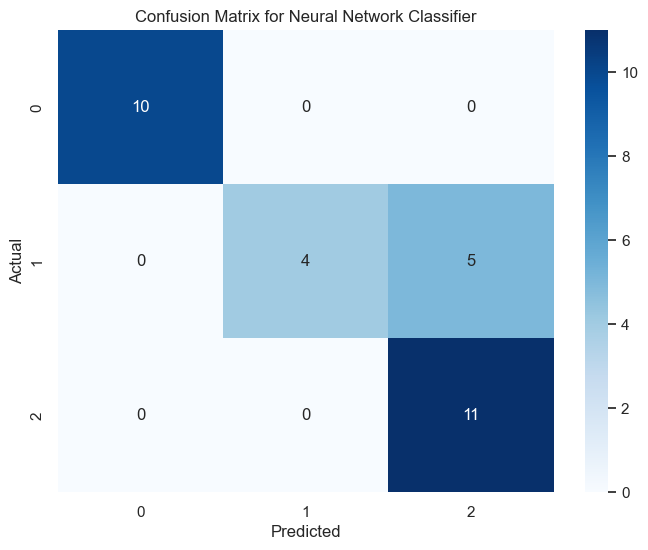

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input_shape to match your dataset
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Use 3 for the Iris dataset; adjust as needed for your dataset
])

# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
nn_pred = nn_model.predict(X_test)

# Convert probabilities to class labels
nn_pred = nn_pred.argmax(axis=1)

# Create the confusion matrix
nn_cm = confusion_matrix(y_test, nn_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, cmap="Blues", fmt="g")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network Classifier")

# Show the plot
plt.show()


# Making Predictions

In [70]:
input_data = (80, 0, 140, 0, 0, 0.184854, 0, 1)  # Adjust to match your 8 features

# Proceed with the rest of the code
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction and get probabilities
prediction = best_rfc.predict(input_data_reshaped)
predicted_class_prob = best_rfc.predict_proba(input_data_reshaped)
predicted_class_prob_percent = (predicted_class_prob[0][prediction[0]] * 100).round(2)

# Print prediction result and corresponding actions
print(f"Prediction: {prediction[0]}")
print(f"Predicted Probability (%): {predicted_class_prob_percent}")

if prediction[0] == 0 and 60 <= predicted_class_prob_percent <= 100:
    print('Negative!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 0 and 45 <= predicted_class_prob_percent <= 59:
    print('Negative!')
    print('Confirmatory Test Recommended!')
elif prediction[0] == 1 and 60 <= predicted_class_prob_percent <= 100:
    print('Positive!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 1 and 45 <= predicted_class_prob_percent <= 59:
    print('Positive!')
    print('Confirmatory Test Recommended!')


Prediction: 1
Predicted Probability (%): 90.07
Positive!
No confirmatory Test Recommended!


# Modifying Prediction Result

In [71]:
input_data = (80, 0, 140, 0, 0, 0.184854, 0, 1)  # Adjust to match your 8 features

# Proceed with the rest of the code
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction and get probabilities
prediction = best_rfc.predict(input_data_reshaped)
predicted_class_prob = best_rfc.predict_proba(input_data_reshaped)
predicted_class_prob_percent = (predicted_class_prob[0][prediction[0]] * 100).round(2)

# Print prediction result and corresponding actions



if prediction[0] == 0 and 60 <= predicted_class_prob_percent <= 100:
    print('Negative!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 0 and 45 <= predicted_class_prob_percent <= 59:
    print('Negative!')
    print('Confirmatory Test Recommended!')
elif prediction[0] == 1 and 60 <= predicted_class_prob_percent <= 100:
    print('Positive!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 1 and 45 <= predicted_class_prob_percent <= 59:
    print('Positive!')
    print('Confirmatory Test Recommended!')
    
print(f"Predicted Probability: {predicted_class_prob_percent}%")

Positive!
No confirmatory Test Recommended!
Predicted Probability: 90.07%


# Checking prediction and probability

In [72]:
print(predictions_df.sample(5000))

       Prediction  Predicted Probability (%)
4590            1                      96.20
9301            0                      98.13
11994           0                      99.91
9611            1                      94.10
7713            0                      99.12
...           ...                        ...
8883            0                      97.31
7608            0                      99.06
6769            0                      98.77
4521            0                      77.57
11875           1                      87.47

[5000 rows x 2 columns]


# creating a file and saving the model

In [73]:
import pickle

# Assuming `best_rfc` is your trained RandomForestClassifier model
filename = 'trained_model_cap_final'

# Save the trained model
pickle.dump(best_rfc, open(filename, 'wb'))


# Loading the model 

In [74]:
loaded_model = pickle.load(open ('trained_model_cap_final', 'rb'))

In [75]:
import numpy as np
input_data = (80, 0, 140, 0, 0, 0.184854, 0, 1)  # Adjust to match your 8 features

# Proceed with the rest of the code
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction and get probabilities
prediction = loaded_model.predict(input_data_reshaped)
predicted_class_prob = loaded_model.predict_proba(input_data_reshaped)
predicted_class_prob_percent = (predicted_class_prob[0][prediction[0]] * 100).round(2)

# Print prediction result and corresponding actions



if prediction[0] == 0 and 60 <= predicted_class_prob_percent <= 100:
    print('Negative!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 0 and 45 <= predicted_class_prob_percent <= 59:
    print('Negative!')
    print('Confirmatory Test Recommended!')
elif prediction[0] == 1 and 60 <= predicted_class_prob_percent <= 100:
    print('Positive!')
    print('No confirmatory Test Recommended!')
elif prediction[0] == 1 and 45 <= predicted_class_prob_percent <= 59:
    print('Positive!')
    print('Confirmatory Test Recommended!')
    
print(f"Predicted Probability: {predicted_class_prob_percent}%")

Positive!
No confirmatory Test Recommended!
Predicted Probability: 90.07%


In [76]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\kufre\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.
